In [2]:
import torch
import numpy as np
from utils import calibrate as cali
import matplotlib.pyplot as plt

In [7]:
size = (1000, 1)
norm_std = np.random.random(size)*1000

In [19]:
residuals = np.random.normal(0, norm_std, size)
# residuals = np.zeros(size)
# stds = np.ones(size)*norm_std
stds = norm_std
# stds = np.random.random(size)
standardized_res = residuals/stds

In [20]:
exp, obs = cali.get_proportion_lists(residuals, stds)

Calibration: 100%|██████████| 100/100 [00:00<00:00, 1060.03it/s]


-0.05193, 0.98457


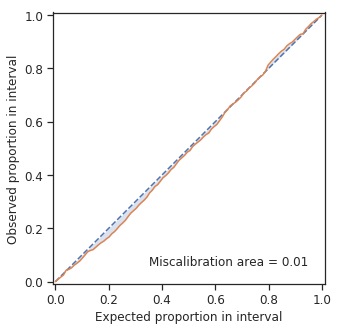

In [21]:
cali.plot_calibration_curve(exp, obs, 'test')
print('{:.5f}, {:.5f}'.format(np.mean(standardized_res), np.std(standardized_res)))

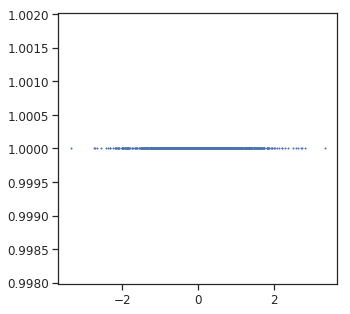

In [22]:
plt.scatter(standardized_res, np.ones_like(standardized_res), s=1)
plt.show()

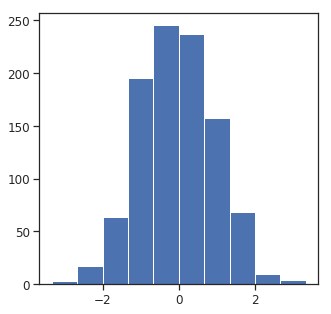

In [53]:
plt.hist(standardized_res)
plt.show()

In [13]:
x = torch.randn(2, 3)

In [14]:
torch.std(torch.cat([x,x,x], 1))

tensor(0.6498)

In [18]:
residuals

array([[ 1.61065750e+02],
       [-3.07834281e+02],
       [ 2.93968032e+01],
       [ 8.20101116e+01],
       [-2.03964803e+02],
       [-4.19411359e+02],
       [ 9.42419354e+00],
       [-1.09694526e+02],
       [ 7.09679440e+02],
       [ 3.43542404e+01],
       [ 2.73366750e+02],
       [ 8.03717642e+02],
       [-8.82484139e+02],
       [ 9.18187460e+02],
       [ 1.00241959e+03],
       [ 4.51793320e+02],
       [-4.96826206e+02],
       [ 6.53914678e+02],
       [-1.85665508e+02],
       [-2.85141278e+02],
       [ 1.41295613e+02],
       [ 4.49474221e+02],
       [ 7.97882410e+02],
       [-2.62298467e+02],
       [ 1.43710815e+01],
       [ 1.46710812e+02],
       [-5.66884811e+02],
       [ 1.09373123e+01],
       [ 1.74477641e+01],
       [ 9.47840511e+01],
       [ 3.51204788e+02],
       [-1.23778796e+01],
       [ 1.02760527e+02],
       [ 3.40004562e+02],
       [-4.27377026e+02],
       [ 3.85619291e+02],
       [ 1.68201282e+02],
       [ 3.69989383e+01],
       [-9.6

In [43]:
test_X = np.random.uniform(-3,3,1000)
mean_fn = lambda x: x**2 + 1

In [44]:
test_Y_mean = mean_fn(test_X)

In [52]:
def add_noise(X):
    if X < 0:
        return mean_fn(X)+np.random.normal(loc=0, scale=1), 1
    else:
        return mean_fn(X)+np.random.normal(loc=0, scale=3), 3

In [69]:
test_Y = []
test_std = []
for X in test_X:
    Y, std = add_noise(X)
    test_Y.append(Y)
    test_std.append(std)
test_Y = np.array(test_Y)
test_std = np.array(test_std)

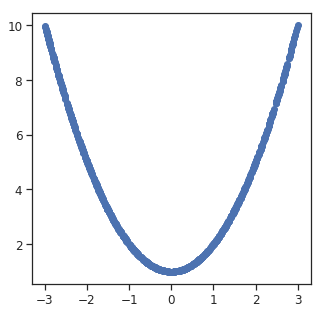

In [70]:
plt.scatter(test_X, test_Y_mean)

In [71]:
order = test_X.argsort()

<ErrorbarContainer object of 3 artists>

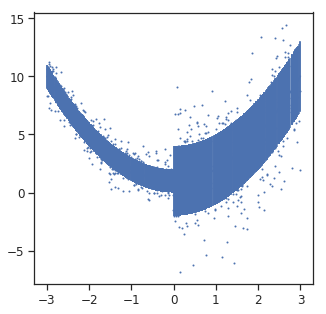

In [72]:
plt.scatter(test_X, test_Y, s=1)
plt.errorbar(test_X[order], test_Y_mean[order], yerr=test_std[order])


In [56]:
resids = np.array(test_Y) - np.array(test_Y_mean)

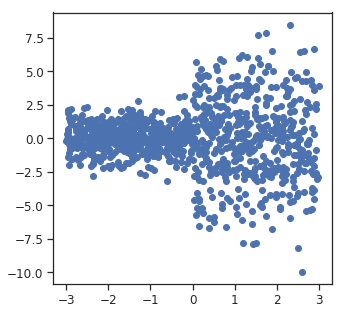

In [57]:
plt.scatter(test_X, resids)

In [58]:
exp, obs = cali.get_proportion_lists(resids, np.array(test_std))


Calibration: 100%|██████████| 100/100 [00:00<00:00, 998.63it/s]

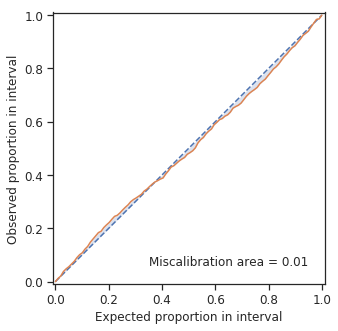

In [60]:
cali.plot_calibration_curve(exp, obs, 'test')

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  1.,  3.,  0.,
         0.,  1.,  0.,  6.,  3.,  4.,  5.,  6.,  3.,  5.,  7.,  9.,  6.,
         6., 11.,  9., 10., 12., 11.,  5.,  8., 11., 16., 18., 12., 24.,
        18., 29., 18., 25., 11., 20., 21., 23., 27., 27., 33., 26., 32.,
        26., 29., 27., 21., 22., 15., 23., 22., 21., 15., 16., 21., 16.,
         8., 14., 16., 11., 21., 16., 15., 10., 14., 12.,  9.,  6.,  7.,
         4.,  5.,  2.,  4.,  6.,  2.,  6.,  3.,  1.,  1.,  0.,  0.,  0.,
         2.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  2.]),
 array([-3.32084713, -3.25632406, -3.19180099, -3.12727792, -3.06275485,
        -2.99823178, -2.93370871, -2.86918564, -2.80466257, -2.7401395 ,
        -2.67561643, -2.61109336, -2.54657029, -2.48204722, -2.41752415,
        -2.35300108, -2.28847801, -2.22395494, -2.15943187, -2.0949088 ,
        -2.03038573, -1.96586266, -1.90133959, -1.83681652, -1.77229345,
        -1.70777038, -1.64324731, -1.57872424, -1.51420117, -1.449678

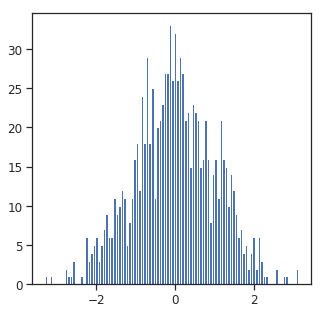

In [76]:
plt.hist(resids/test_std, bins=100)